In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.dqn import DQN
from networks.lstm_dueling import LSTMDueling

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 20
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

batch_size = 10
target_net = LSTMDueling(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

policy_net = LSTMDueling(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

dqn = DQN(
    env=env,
    env_type='vector',
    n_actions=3,
    log_freq=1,
    train_freq=3,
    batch_size=batch_size,
    w_sync_freq=1,
    memory_size=500,
    gamma=0.9995,
    step_size=0.01,
    episodes=500,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.SmoothL1Loss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.00008),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_d_lstm',
    network_type='lstm',
)

In [2]:
dqn.run(500)

collecting experience...

Ep: 0 | TS: 19970 | L: 193491.897 | R: -22.78 | P: 15.65 | R.Avg P: 15.65 | NW: 115.65 | R.Avg NW: 115.65 | R.U: 219
Ep: 1 | TS: 39940 | L: 185900.819 | R: -25.38 | P: 9.22 | R.Avg P: 12.44 | NW: 109.22 | R.Avg NW: 112.44 | R.U: 213
Ep: 2 | TS: 59910 | L: 178671.044 | R: -24.29 | P: 7.25 | R.Avg P: 10.71 | NW: 107.25 | R.Avg NW: 110.71 | R.U: 210
Ep: 3 | TS: 79880 | L: 183348.606 | R: -22.51 | P: 14.58 | R.Avg P: 11.68 | NW: 114.58 | R.Avg NW: 111.68 | R.U: 212
Ep: 4 | TS: 99850 | L: 205690.474 | R: -17.71 | P: 25.02 | R.Avg P: 14.34 | NW: 125.02 | R.Avg NW: 114.34 | R.U: 218
Ep: 5 | TS: 119820 | L: 166795.422 | R: -23.97 | P: 8.63 | R.Avg P: 13.39 | NW: 108.63 | R.Avg NW: 113.39 | R.U: 217
Ep: 6 | TS: 139790 | L: 153667.696 | R: -30.91 | P: -19.05 | R.Avg P: 8.76 | NW: 80.95 | R.Avg NW: 108.76 | R.U: 208
Ep: 7 | TS: 159760 | L: 302491.352 | R: -11.6 | P: 35.63 | R.Avg P: 12.12 | NW: 135.63 | R.Avg NW: 112.12 | R.U: 217
Ep: 8 | TS: 179730 | L: 313573.403 | R: 

KeyboardInterrupt: 

/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


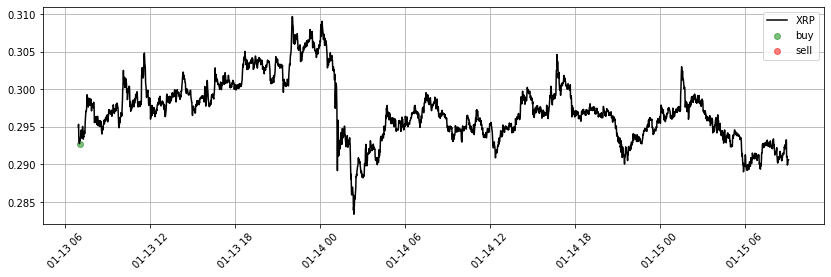

Avg.Rewards: -10.0 | Avg.Profit: 1.48 | Avg.Units: 341 | Avg.Bal: 0.17


In [6]:
dqn.evaluate(start_dt='2021-01-13 07:00', duration=3000)

### Visualizations

### Traning

Text(0.5, 1.0, 'Rolling avg balance per episode')

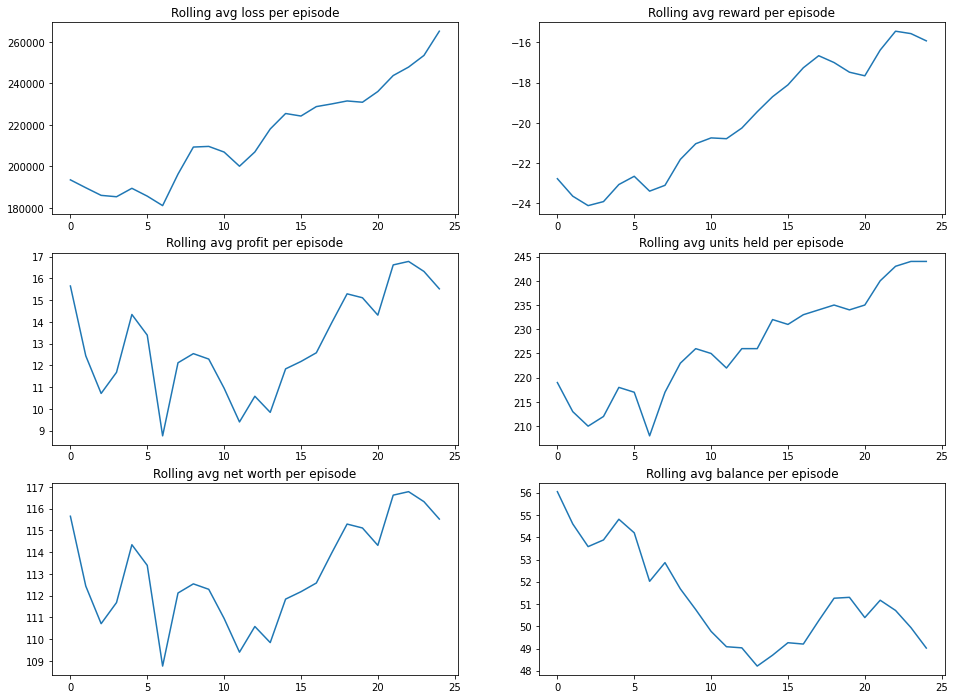

In [3]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in dqn.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [ ]:
# torch.save(dqn.target_net.state_dict(), '../models/dqn_d_lstm/target_net')
# torch.save(dqn.policy_net.state_dict(), '../models/dqn_d_lstm/policy_net')